# Group Assignment - Machine Learning - Group 8

Report Outline Requiments:

1. Objective: What are you setting out to prove or predict? What is the business or other problem that you are trying to address with this model?
2. Data Preparation: What was your data source (e.g., web scraping, corporate data, a standard machine learning data set, open data, etc.)? How good was the data quality? What did you need to do to procure it? What tools or code did you need to use to prepare it for analysis? What challenges did you face?
3. Model Design: Describe your (two or more) models. How did you choose hyperparameters if they were required? Why did you choose those particular machine learning models?
4. Model Evaluation: How well did the model perform on the set-aside testing dataset? If you attempted an ensemble model how did it perform vs. the individual models in the ensemble?
5. Conclusions: Did you prove/disprove your hypothesis or create a useful model? What did you learn about your dataset? What would you do next to improve your model?


Data Description:

* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents

URL :https://www.kaggle.com/blastchar/telco-customer-churn

### Preamble

1. Objective - To develop a predictive classifier model(s) for those customers churn i.e. those expected to leave. This model would be useful in a business case for targeted advertisments to improve customer retention and churn reduction.


## 0.a Load libraries

In [7]:
import numpy as np
import pandas as pd
import time

# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

#Pre-processing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#Model Design
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

#Model Evalutation
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

## 0.1  Data Exploration and Cleaning

In [9]:
filepath = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'

url = 'https://www.kaggle.com/blastchar/telco-customer-churn/download.csv'

df = pd.read_csv(filepath)

df.head(3)

FileNotFoundError: ignored

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


TotalCharges appears to be an object while it should be a float64. This column must be converted prior to use in the model.

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
dep_var = ['Churn']

categorical_vars = ['gender', 'Partner','Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup','DeviceProtection',  'TechSupport','TechSupport', 
                    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

discrete_vars = ['SeniorCitizen', 'tenure']

continuous_vars = ['MonthlyCharges', 'TotalCharges']

print('Number columns in dataframe:',len(df.columns))
print('Number of variables for model:', len(dep_var)+len(categorical_vars)+len(discrete_vars)+len(continuous_vars))

Number columns in dataframe: 21
Number of variables for model: 21


In [ ]:
df.loc[:, discrete_vars + continuous_vars].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# 1.0 Pre-processing Pipeline

In [ ]:
#pipeline for categorical variables

cat_si_step = ('si', SimpleImputer(strategy='median')) 
cat_ohe_step = ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))
cat_steps = [ cat_ohe_step, cat_si_step]

cat_pipe = Pipeline(cat_steps)
cat_transformers = [('cat', cat_pipe, categorical_vars)] 

In [ ]:
#pipeline for Discrete variables

num_si_step = ('si', SimpleImputer(strategy='median'))
num_scl_step = ('scl', MinMaxScaler())
num_steps = [num_si_step, num_scl_step]
num_pipe = Pipeline(num_steps)
num_transformers = [('num', num_pipe, discrete_vars + continuous_vars)]

In [ ]:
ct = ColumnTransformer(transformers=cat_transformers + num_transformers)
ct.fit(df[categorical_vars + discrete_vars+ continuous_vars])

X = ct.transform(df[categorical_vars + discrete_vars+ continuous_vars])

le = LabelEncoder()
le.fit(np.ravel(df[dep_var]))
y = le.transform(np.ravel(df[dep_var]))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5634, 54) (1409, 54) (5634,) (1409,)


## 2.0 Model Selection

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_train, np.ravel(y_train))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [4, 5, 10, 20, 50]
}

grid_search = GridSearchCV(estimator=rfc,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=5)

grid_search.fit(X=X_train, y=np.ravel(y_train))

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
final_rfc = grid_search.best_estimator_

print(grid_search.best_params_)
print('Accuracy is ', accuracy_score(y_test, final_rfc.predict(X_test)))
print("\n",final_rfc)

{'n_estimators': 50}
Accuracy is  0.7899219304471257

 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [ ]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, np.ravel(y_train))

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'degree': [2, 3, 4, 5, 10, 20]
}

grid_search = GridSearchCV(estimator=svc,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=5)

grid_search.fit(X=X_train, y=np.ravel(y_train))

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'degree': [2, 3, 4, 5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [ ]:
final_svc = grid_search.best_estimator_

print(grid_search.best_params_)
print('Accuracy is ', accuracy_score(y_test, final_svc.predict(X_test)))
print("\n",final_svc)

{'degree': 2}
Accuracy is  0.7920511000709723

 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()

abc.fit(X_train, np.ravel(y_train))

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 50, 100, 150, 200, 300],
    'learning_rate' :  [0.1, 0.3, 0.5, 0.8, 1, 2, 3, 4]
}

grid_search = GridSearchCV(estimator=abc,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=5)

grid_search.fit(X=X_train, y=np.ravel(y_train))

GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.3, 0.5, 0.8, 1, 2, 3, 4],
                         'n_estimators': [10, 50, 100, 150, 200, 300]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [ ]:
final_abc = grid_search.best_estimator_

print(grid_search.best_params_)
print('Accuracy is ', accuracy_score(y_test, final_abc.predict(X_test)))
print("\n",final_abc)

{'learning_rate': 0.1, 'n_estimators': 150}
Accuracy is  0.8005677785663591

 AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=150, random_state=None)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

gbc.fit(X_train, np.ravel(y_train))

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 50, 100, 150, 200, 300],
    'learning_rate' :  [0.1, 0.3, 0.5, 0.8, 1, 2]
}

grid_search = GridSearchCV(estimator=gbc,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=5)

grid_search.fit(X=X_train, y=np.ravel(y_train))

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [ ]:
final_gbc = grid_search.best_estimator_

print(grid_search.best_params_)
print('Accuracy is ', accuracy_score(y_test, final_gbc.predict(X_test)))
print("\n",final_gbc)

{'learning_rate': 0.1, 'n_estimators': 50}
Accuracy is  0.8034066713981547

 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', random_state=123)

clf.fit(X_train, np.ravel(y_train))

C:\Users\steve\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=123, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
print('Accuracy is ', accuracy_score(y_test, clf.predict(X_test)))

Accuracy is  0.7601135557132718


In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, np.ravel(y_train))

C:\Users\steve\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

grid_search = GridSearchCV(estimator=lr,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=5)

grid_search.fit(X=X_train, y=np.ravel(y_train))

SyntaxError: invalid syntax (<ipython-input-136-d1882c17b9dc>, line 12)

In [ ]:
final_lr = grid_search.best_estimator_

print(grid_search.best_params_)
print("\n",final_lr)

{'solver': 'liblinear'}

 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


## 3.0 Model Evaluation

In [ ]:
print('Final Random Forest Classifier Cross validation scores are: ', cross_val_score(final_rfc, X, np.ravel(y), 
                                                                                      cv=5, scoring='roc_auc'))

Final Random Forest Classifier Cross validation scores are:  [0.82894805 0.83145134 0.79271487 0.79901957 0.81478268]


Confusion matrix, without normalization
[[919  96]
 [174 220]]
Normalized confusion matrix
[[0.90541872 0.09458128]
 [0.44162437 0.55837563]]


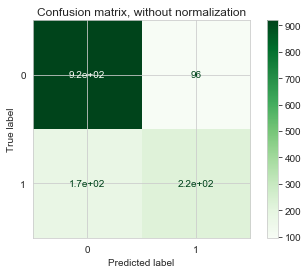

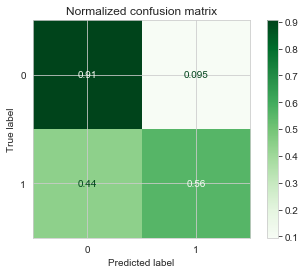

In [ ]:
# Plot confusion matrix for Random Forest Classifier 


titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    
    disp = plot_confusion_matrix(final_lr, X_test, y_test, cmap=plt.cm.Greens,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

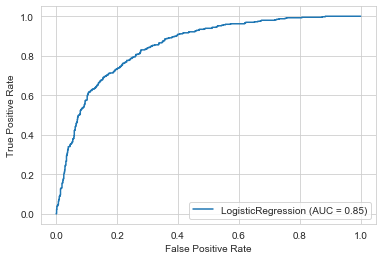

In [ ]:
plot_roc_curve(final_lr, X_test, y_test)
plt.show()  